# Sharpe Ratio and Portfolio Values

Comparative analysis of the well known companies from the GameDev industry listed on NASDAQ.

In [1]:
# Importing libraries
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

## Create a portfolio of compared companies

In [2]:
# Set time frames for analysis
start = pd.to_datetime('2009-01-01')
end = pd.to_datetime('2019-03-29')

In [3]:
# Get a stock data for portfolio

# Activision Blizzard Inc. (ATVI)
atvi = quandl.get('WIKI/ATVI', start_date=start, end_date=end)

# Take-Two Interactive Software Inc. (TTWO)
ttwo = quandl.get('WIKI/TTWO', start_date=start, end_date=end)

# Electronic Arts Inc. (EA)
ea = quandl.get('WIKI/EA', start_date=start, end_date=end)

In [4]:
# Quick look at the dataset
atvi.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2009-01-02,8.78,9.16,8.51,9.12,8077100.0,0.0,1.0,8.025906,8.373269,7.779096,8.336705,8077100.0
2009-01-05,9.00,9.07,8.62,8.75,8074400.0,0.0,1.0,8.227011,8.290999,7.879648,7.998483,8074400.0
2009-01-06,8.81,8.89,8.14,8.18,24157500.0,0.0,1.0,8.053330,8.126459,7.440874,7.477439,24157500.0
2009-01-07,8.20,9.42,8.18,9.08,44055500.0,0.0,1.0,7.495721,8.610938,7.477439,8.300140,44055500.0
2009-01-08,9.25,9.62,8.86,9.26,22458800.0,0.0,1.0,8.455539,8.793761,8.099035,8.464680,22458800.0


## Normalize Prices

The Normalized Price indicator graphs the price movement of an instrument using 100 as the base value for a user specified base date/time. The normalized value for each bar after the base date/time is the percent of the base price expressed as a whole number. **In simple words this is a cumulative daily return.**

**Adjusted Closing Price**

It is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open (eg. stock splits, dividends). The adjusted closing price is often used when **examining historical returns or performing a detailed analysis of historical returns**.

Source: https://www.investopedia.com


In [5]:
for stock_df in (atvi, ttwo, ea):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [6]:
atvi[['Adj. Close', 'Normed Return']].head()

,Adj. Close,Normed Return
Date,,
2009-01-02,8.336705,1.000000
2009-01-05,7.998483,0.959430
2009-01-06,7.477439,0.896930
2009-01-07,8.300140,0.995614
2009-01-08,8.464680,1.015351


## Allocations

Let's make a sample assumption for our portfolio.

* 50% in Activision Blizzard
* 20% in Take-Two Interactive Software
* 30% in Electronic Arts

In [7]:
for stock_df, allo in zip([atvi, ttwo, ea],[0.5,0.2,0.3]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [8]:
atvi.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Normed Return,Allocation
Date,,,,,,,,,,,,,,
2009-01-02,8.78,9.16,8.51,9.12,8077100.0,0.0,1.0,8.025906,8.373269,7.779096,8.336705,8077100.0,1.000000,0.500000
2009-01-05,9.00,9.07,8.62,8.75,8074400.0,0.0,1.0,8.227011,8.290999,7.879648,7.998483,8074400.0,0.959430,0.479715
2009-01-06,8.81,8.89,8.14,8.18,24157500.0,0.0,1.0,8.053330,8.126459,7.440874,7.477439,24157500.0,0.896930,0.448465
2009-01-07,8.20,9.42,8.18,9.08,44055500.0,0.0,1.0,7.495721,8.610938,7.477439,8.300140,44055500.0,0.995614,0.497807
2009-01-08,9.25,9.62,8.86,9.26,22458800.0,0.0,1.0,8.455539,8.793761,8.099035,8.464680,22458800.0,1.015351,0.507675


## Investment

Now, it's time to set the investment amount for portfolio. For further calculation let's assume we have $100000.


In [9]:
# Set the value of investment
investment = 100000

In [10]:
for stock_df in [atvi, ttwo, ea]:
    stock_df['Position Values'] = stock_df['Allocation'] * investment

## Total Portfolio Value

In [11]:
portfolio_value = pd.concat([atvi['Position Values'], ttwo['Position Values'], ea['Position Values']], axis=1)

In [12]:
# Changing the names of columns for each company
portfolio_value.columns = ['ATVI Pos', 'TTWO Pos', 'EA Pos']

In [13]:
portfolio_value.head()

,ATVI Pos,TTWO Pos,EA Pos
Date,,,
2009-01-02,50000.000000,20000.000000,30000.000000
2009-01-05,47971.491228,20477.987421,28727.064220
2009-01-06,44846.491228,19849.056604,31926.605505
2009-01-07,49780.701754,19446.540881,30550.458716
2009-01-08,50767.543860,20352.201258,32425.458716


In [14]:
portfolio_value['Total Pos'] = portfolio_value.sum(axis=1)

In [15]:
portfolio_value.head()

,ATVI Pos,TTWO Pos,EA Pos,Total Pos
Date,,,,
2009-01-02,50000.000000,20000.000000,30000.000000,100000.000000
2009-01-05,47971.491228,20477.987421,28727.064220,97176.542870
2009-01-06,44846.491228,19849.056604,31926.605505,96622.153336
2009-01-07,49780.701754,19446.540881,30550.458716,99777.701350
2009-01-08,50767.543860,20352.201258,32425.458716,103545.203833


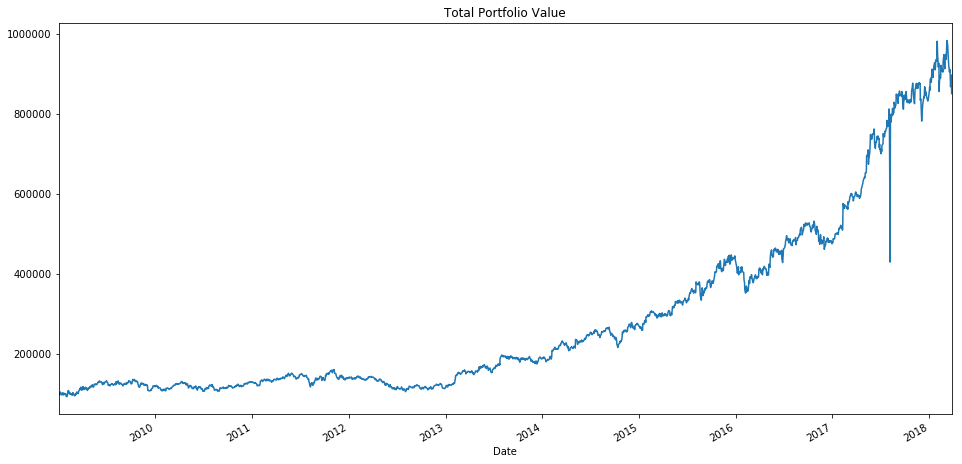

In [16]:
portfolio_value['Total Pos'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

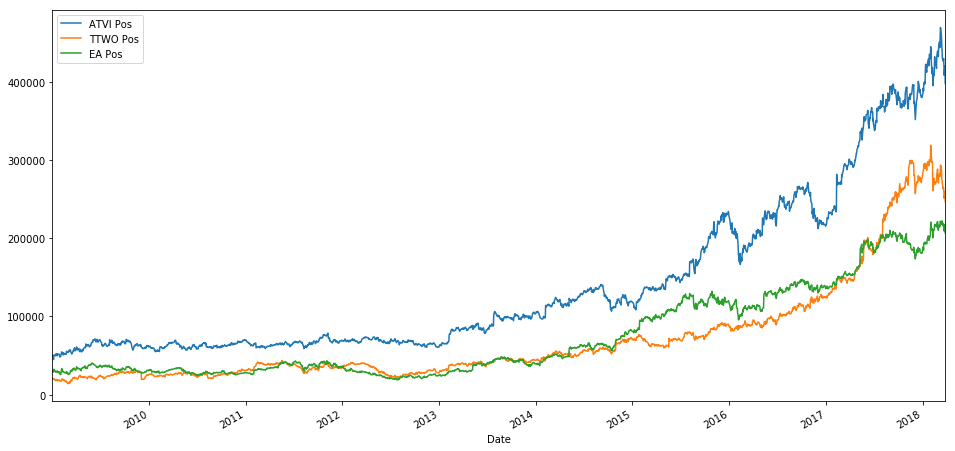

In [17]:
portfolio_value.drop('Total Pos', axis=1).plot(kind='line', figsize=(16,8))

## Portfolio Statistics


### Daily Returns

In [21]:
portfolio_value['Daily Return'] = portfolio_value['Total Pos'].pct_change(1)
portfolio_value.head()

,ATVI Pos,TTWO Pos,EA Pos,Total Pos,Daily Return
Date,,,,,
2009-01-02,50000.000000,20000.000000,30000.000000,100000.000000,NaN
2009-01-05,47971.491228,20477.987421,28727.064220,97176.542870,-0.028235
2009-01-06,44846.491228,19849.056604,31926.605505,96622.153336,-0.005705
2009-01-07,49780.701754,19446.540881,30550.458716,99777.701350,0.032659
2009-01-08,50767.543860,20352.201258,32425.458716,103545.203833,0.037759


### Cumulative Return

In [25]:
cum_ret = 100 * (portfolio_value['Total Pos'][-1] / portfolio_value['Total Pos'][0] -1)
print(f'Cumulative Return was: {round(cum_ret,2)}%')

Cumulative Return was: 750.61%


### Avg Daily Return

In [26]:
portfolio_value['Daily Return'].mean()

0.0012349763693776722

### Std Daily Return

In [27]:
portfolio_value['Daily Return'].std()

0.026375985903317165

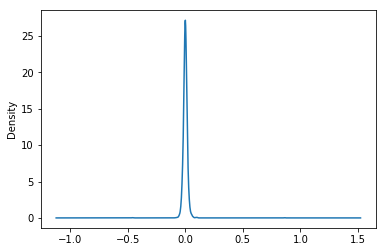

In [28]:
portfolio_value['Daily Return'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Source: http://www.investopedia.com/terms/s/sharperatio

In [29]:
SR = portfolio_value['Daily Return'].mean() / portfolio_value['Daily Return'].std()
SR

0.046821998385370531

In [30]:
ASR = (252**0.5)*SR
ASR

0.74327618168854936